# Importing Libraries 

In [29]:
import pandas as pd
import sys 
import seaborn as sns
import matplotlib.pyplot as plt
print (sys.version)
print("pandas version", pd.__version__)

3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]
pandas version 2.1.4


In [30]:
df=pd.read_excel('../input/pizza-data-sales/Data Model - Pizza Sales.xlsx')
df.head()

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


# Checking for erros / Data Cleaning

In [31]:
df.describe()

,order_details_id,order_id,quantity,order_date,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,2015-06-29 11:03:43.611682560,16.494132,16.821474
min,1.000000,1.000000,1.000000,2015-01-01 00:00:00,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,2015-03-31 00:00:00,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,2015-06-28 00:00:00,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,2015-09-28 00:00:00,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,2015-12-31 00:00:00,35.950000,83.000000
std,14035.529381,6180.119770,0.143077,NaN,3.621789,4.437398


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_details_id   48620 non-null  int64         
 1   order_id           48620 non-null  int64         
 2   pizza_id           48620 non-null  object        
 3   quantity           48620 non-null  int64         
 4   order_date         48620 non-null  datetime64[ns]
 5   order_time         48620 non-null  object        
 6   unit_price         48620 non-null  float64       
 7   total_price        48620 non-null  float64       
 8   pizza_size         48620 non-null  object        
 9   pizza_category     48620 non-null  object        
 10  pizza_ingredients  48620 non-null  object        
 11  pizza_name         48620 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 4.5+ MB


In [33]:
print(df['order_details_id'].is_unique)

True


In [34]:
df['calculated_total'] = df['quantity'] * df['unit_price']
discrepancies = df[df['calculated_total'] != df['total_price']]
print(discrepancies)

Empty DataFrame
Columns: [order_details_id, order_id, pizza_id, quantity, order_date, order_time, unit_price, total_price, pizza_size, pizza_category, pizza_ingredients, pizza_name, calculated_total]
Index: []


In [35]:
df['pizza_size'] = df['pizza_size'].str.strip().str.lower()
df['pizza_category'] = df['pizza_category'].str.strip().str.lower()

In [36]:
df['pizza_size'] = df['pizza_size'].str.strip().str.lower()
df['pizza_category'] = df['pizza_category'].str.strip().str.lower()

In [37]:
duplicates = df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [order_details_id, order_id, pizza_id, quantity, order_date, order_time, unit_price, total_price, pizza_size, pizza_category, pizza_ingredients, pizza_name, calculated_total]
Index: []


In [38]:
print(df[(df['quantity'] <= 0) | (df['unit_price'] <= 0) | (df['total_price'] <= 0)])


Empty DataFrame
Columns: [order_details_id, order_id, pizza_id, quantity, order_date, order_time, unit_price, total_price, pizza_size, pizza_category, pizza_ingredients, pizza_name, calculated_total]
Index: []


In [39]:
print(df['order_date'].min(), df['order_date'].max())

2015-01-01 00:00:00 2015-12-31 00:00:00


no missing values in the dataset 
no discrepancies were found 
no rows with invalid numerical values 
no duplicates 

# Exploratory Data Analysis / Data Visualization 

In [40]:
df.isnull().sum()

order_details_id     0
order_id             0
pizza_id             0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
calculated_total     0
dtype: int64

In [62]:
pizza_orders = df['pizza_name'].value_counts()
most_ordered_pizza = pizza_orders.idxmax()
most_ordered_pizza_count = pizza_orders.max()
print(f"The most ordered pizza is: {most_ordered_pizza} with {most_ordered_pizza_count} orders.")

The most ordered pizza is: The Classic Deluxe Pizza with 2416 orders.


In [64]:
pizza_size_orders = df['pizza_size'].value_counts 
most_ordered_size = pizza_size_orders.idxmax()
most_ordered_size_count = pizza_size_orders.max()
print(f"The most ordered pizza size is: {most_ordered_size} with {most_ordered_size_count} orders.")


The most ordered pizza size is: l with 18526 orders.


Most Preferred Pizza:
pizza_name
The Classic Deluxe Pizza      2416
The Barbecue Chicken Pizza    2372
The Hawaiian Pizza            2370
The Pepperoni Pizza           2369
The Thai Chicken Pizza        2315
Name: count, dtype: int64


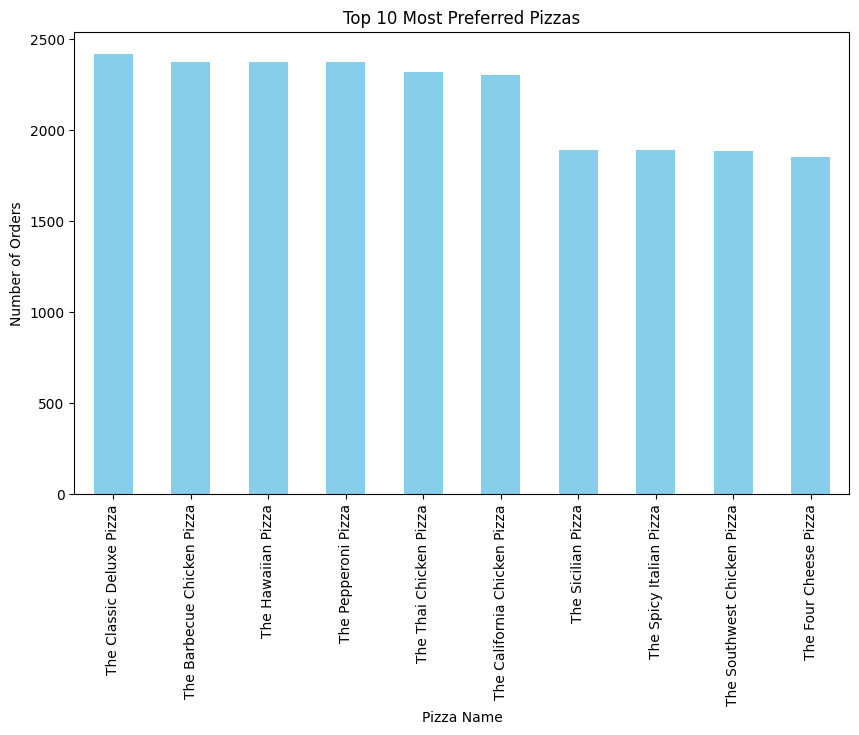

In [70]:
most_preferred_pizza = df['pizza_name'].value_counts()
print("Most Preferred Pizza:")
print(most_preferred_pizza.head())
most_preferred_pizza.head(10).plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Top 10 Most Preferred Pizzas')
plt.xlabel('Pizza Name')
plt.ylabel('Number of Orders')
plt.show()

Orders by Day of the Week:
order_day
Friday       8106
Saturday     7355
Thursday     7323
Wednesday    6797
Tuesday      6753
Monday       6369
Sunday       5917
Name: count, dtype: int64


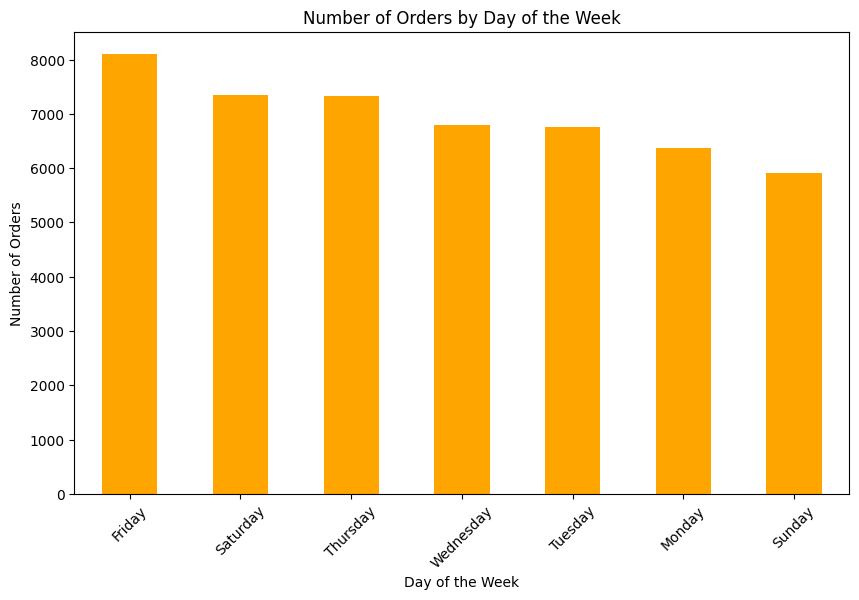

In [71]:
df['order_day'] = df['order_date'].dt.day_name()
orders_by_day = df['order_day'].value_counts()
print("Orders by Day of the Week:")
print(orders_by_day)

orders_by_day.plot(kind='bar', figsize=(10, 6), color='orange')
plt.title('Number of Orders by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

Most Common Ingredients:
 Garlic: 27422
 Tomatoes: 23694
 Red Onions: 19547
 Red Peppers: 16284
Chicken: 8443
 Mushrooms: 8114
 Mozzarella Cheese: 6605
 Pepperoni: 6542
 Green Olives: 6174
 Artichokes: 5682


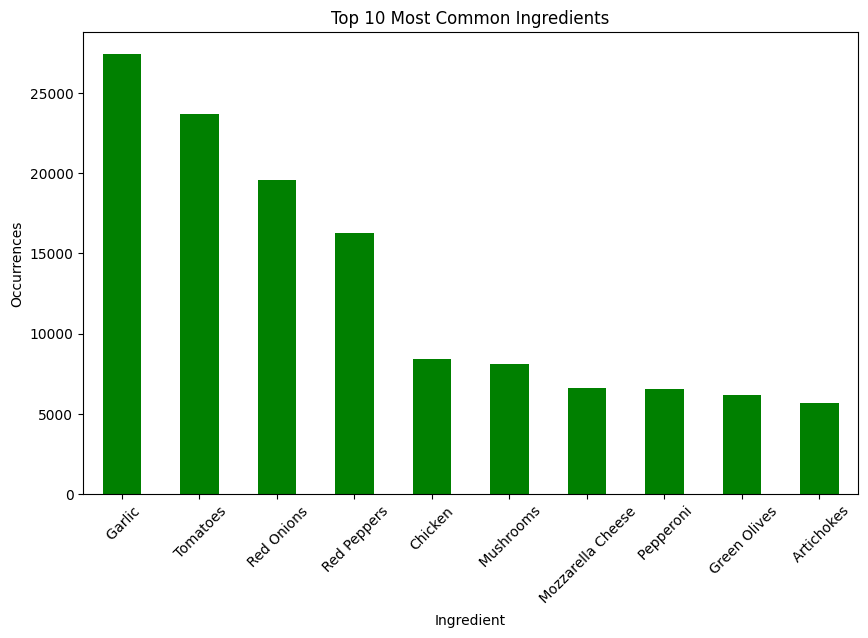

In [73]:
from collections import Counter

ingredients_list = df['pizza_ingredients'].str.split(',').sum()

ingredient_counts = Counter(ingredients_list)
print("Most Common Ingredients:")
for ingredient, count in ingredient_counts.most_common(10):
    print(f"{ingredient}: {count}")
    
pd.Series(dict(ingredient_counts.most_common(10))).plot(kind='bar', figsize=(10, 6), color='green')
plt.title('Top 10 Most Common Ingredients')
plt.xlabel('Ingredient')
plt.ylabel('Occurrences')
plt.xticks(rotation=45)
plt.show()

## Summary :

- The Classic Deluxe Pizza is the most ordered with 2416 Orders

- The most ordered Pizza size is L with 18526 orders 

- Friday seems to have the most orders amount while Saturday and Thursday almost the same

- Garlic is the most used ingredient with Artichokes being the least used 